# RAT 6.3  

We will use the data in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv`.  

1) Fit a multiple regression model to predict $y$.  

In [27]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv("https://s3-us-west-2.amazonaws.com/dsci/6002/data/homer.csv")
df = df.dropna(axis=0)

print(df.head())

print(df.columns)


         y        x1        x2        x3        x4        x5       x6
0 -2.17360 -0.023816 -0.012885  0.045936 -0.182890  0.028694 -0.81119
1 -1.29570  0.018453  0.058999 -0.072399  0.008679 -0.084344 -0.24208
2  0.14539  0.054999  0.131770 -0.067223  0.202430  0.127060  0.63388
3  0.92959 -0.018933 -0.010875 -0.028255  0.017912  0.084330  0.66062
4  0.90259 -0.000877  0.066941 -0.048190  0.064742  0.147880  0.26643
Index(['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')


In [28]:
X2 = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6']]
X2 = sm.add_constant(X2)
y2 = df['y']

model2 = sm.OLS(y2, X2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     452.1
Date:                Thu, 06 Oct 2016   Prob (F-statistic):               0.00
Time:                        13:55:01   Log-Likelihood:                -8583.7
No. Observations:                6054   AIC:                         1.718e+04
Df Residuals:                    6047   BIC:                         1.723e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0069      0.013     -0.534      0.593        -0.032     0.018
x1             4.0686      0.508      8.015      0.000         3.073     5.064
x2             1.1412      0.257      4.442      0.000         0.638     1.645
x3             4.0318      0.358     11.249      0.000         3.329     4.734
x4             0.9373      0.127      7.362      0.000         0.688     1.187
x5             3.9840      0.171     23.316      0.000         3.649     4.319
x6             0.9967      0.022     44.744      0.000         0.953     1.040
==============================================================================
Omnibus:                      635.831   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.770
Skew:                           0.070   Prob(JB):                     7.54e-41
Kurtosis:                       2.156   Cond. No.                         41.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2) Comment on the fit.  

we could look at the R^2 value for the fit.  So that means the predictors account for 30% of the variance of y.  Usually that's bad.

3) Interpret the slope coefficient of $x_1$.  

4.0686 is the slope coefficient of x1.  4.06 is the weight of x1 in predicting y.

4) Is the model useful for predicting $y$? Why or why not?

since the p value is low, we reject the null hypothesis that that all the beta coefficients are 0; hence, the model is useful for predicting y.

Populating the interactive namespace from numpy and matplotlib


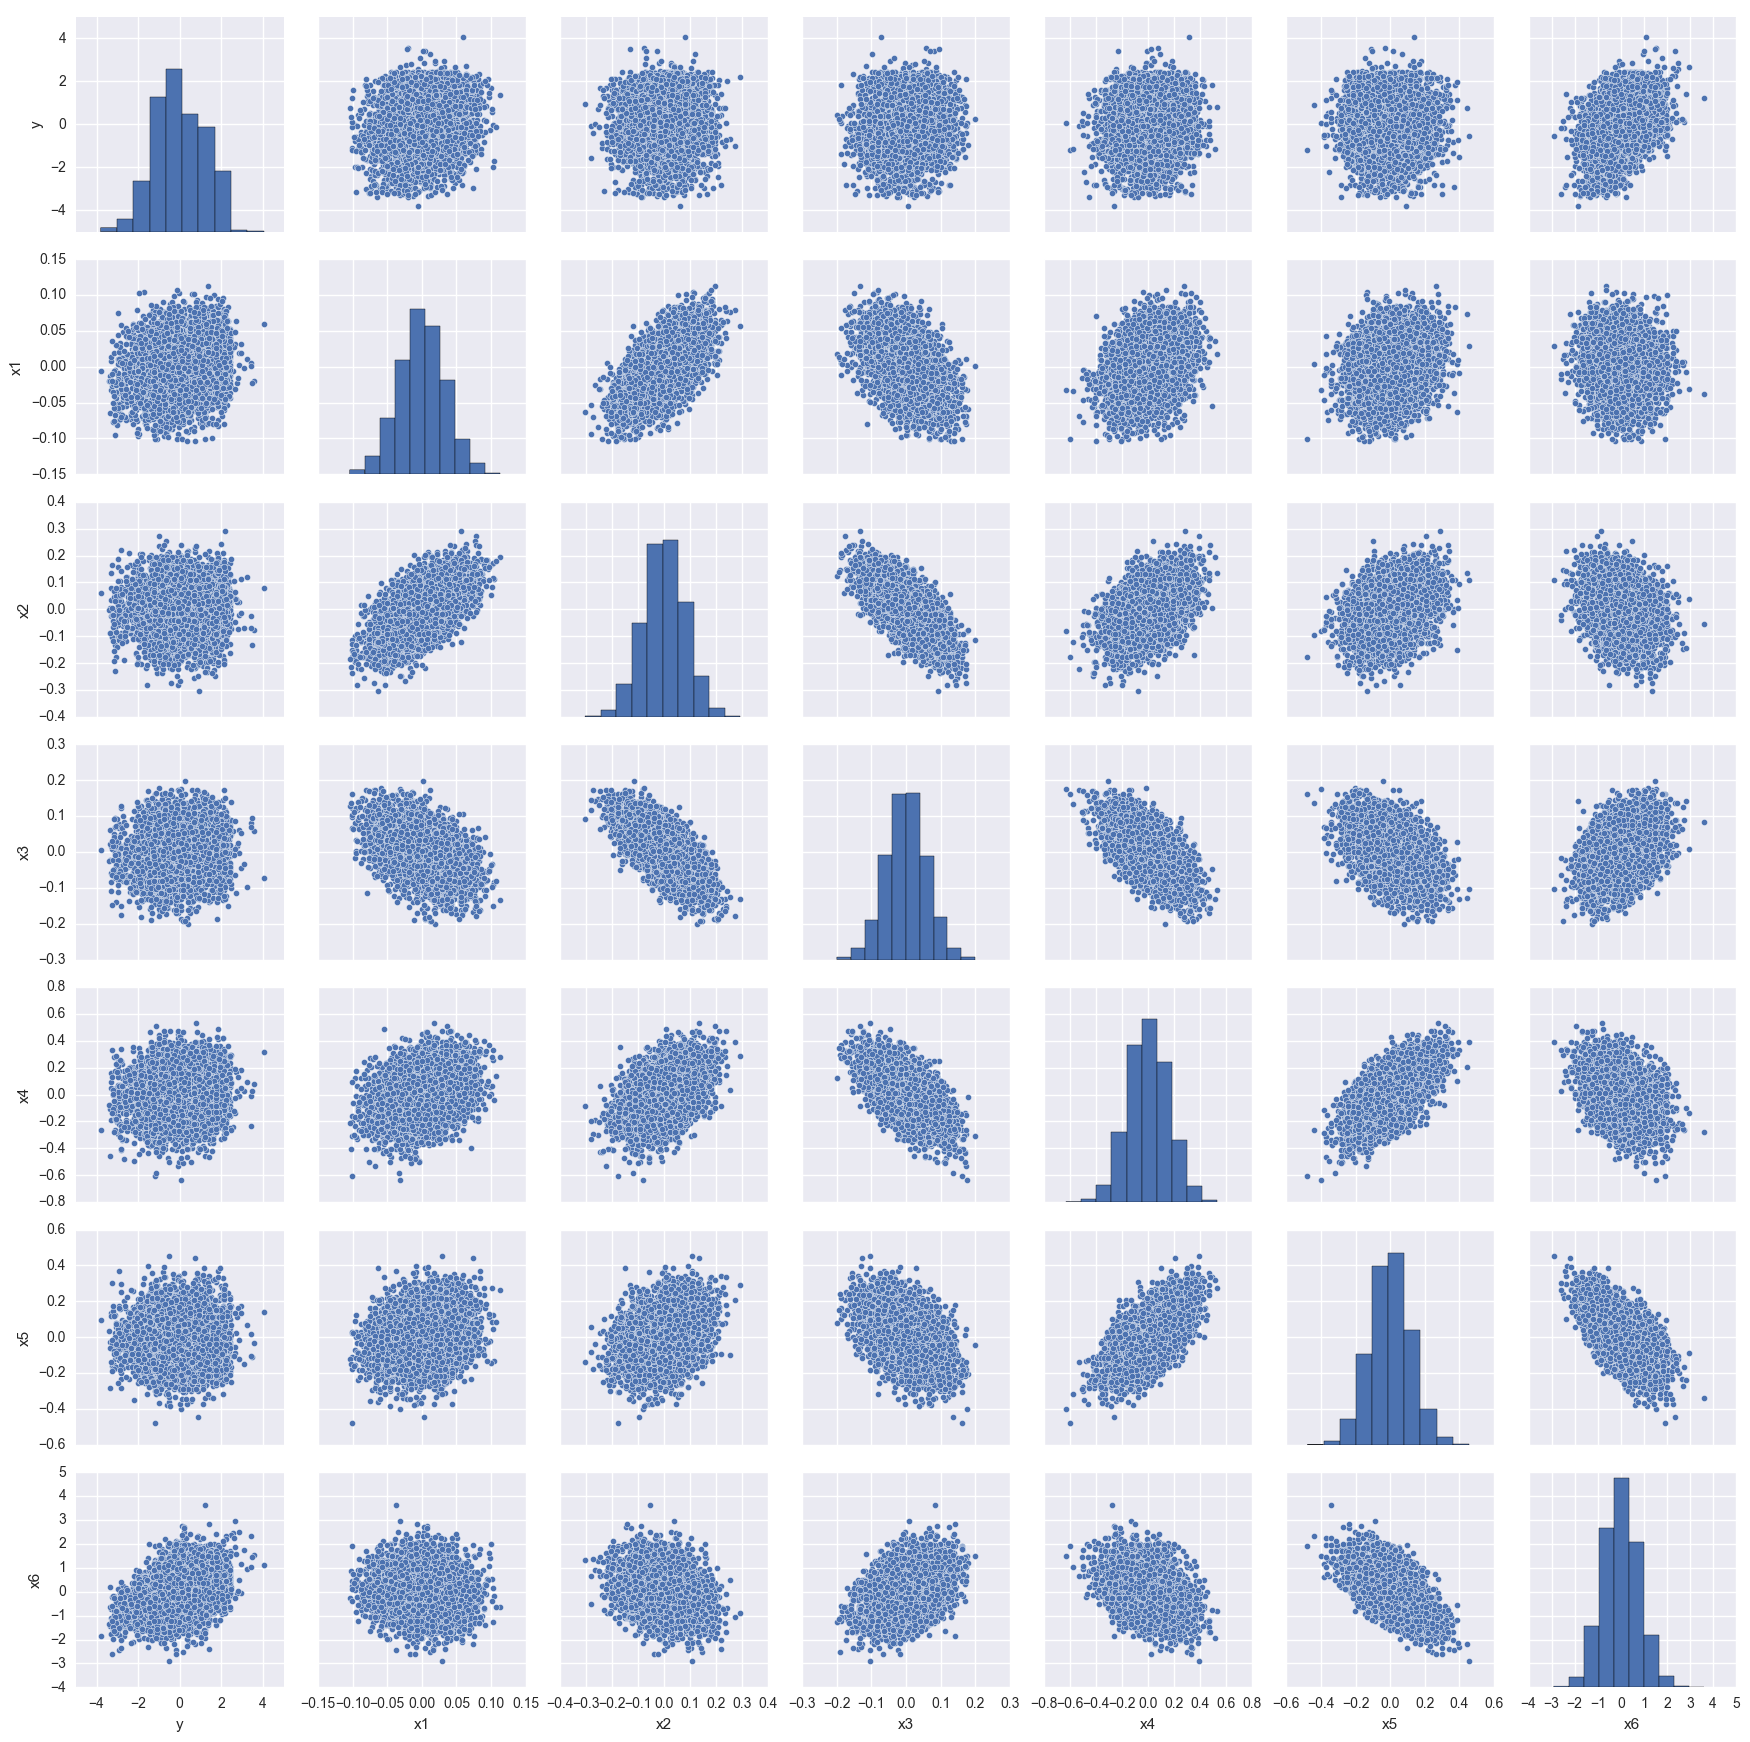

In [32]:
%pylab inline

from seaborn import pairplot

pairplot(df)

In [33]:
df.corr()

,y,x1,x2,x3,x4,x5,x6
y,1.000000,0.153736,0.020611,0.091575,0.071136,0.014765,0.397071
x1,0.153736,1.000000,0.634164,-0.435788,0.312285,0.196147,-0.058372
x2,0.020611,0.634164,1.000000,-0.690712,0.459678,0.316017,-0.266580
x3,0.091575,-0.435788,-0.690712,1.000000,-0.643904,-0.444276,0.387651
x4,0.071136,0.312285,0.459678,-0.643904,1.000000,0.644387,-0.384963
x5,0.014765,0.196147,0.316017,-0.444276,0.644387,1.000000,-0.644617
x6,0.397071,-0.058372,-0.266580,0.387651,-0.384963,-0.644617,1.000000


In [34]:
from scipy.stats import pearsonr

In [40]:
pearsonr(y2, X2.x1)

(0.15373576050150325, 2.4447473778979831e-33)

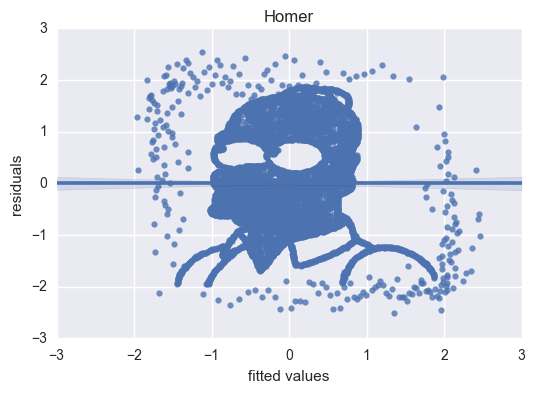

In [47]:
import seaborn as sns

sns.regplot(results2.fittedvalues,results2.resid)
plt.title('Homer')
plt.ylabel('residuals')
plt.xlabel('fitted values')